In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [110]:
produccion = pd.read_csv('20190321_Produccion_Fotovoltaicas.csv')

produccion.head()

,instalacion_fk,cil,fecha,consumo_kWh,produccion_kWh
0,1,ES0264123001068001BT1F001,2011-01-01 01:00:00,0,0
1,1,ES0264123001068001BT1F001,2011-01-01 02:00:00,0,0
2,1,ES0264123001068001BT1F001,2011-01-01 03:00:00,0,0
3,1,ES0264123001068001BT1F001,2011-01-01 04:00:00,0,0
4,1,ES0264123001068001BT1F001,2011-01-01 05:00:00,0,0


In [111]:
produccion['fecha'] = pd.to_datetime(produccion['fecha'])

produccion['hora'] = produccion['fecha'].dt.hour

produccion.head()

,instalacion_fk,cil,fecha,consumo_kWh,produccion_kWh,hora
0,1,ES0264123001068001BT1F001,2011-01-01 01:00:00,0,0,1
1,1,ES0264123001068001BT1F001,2011-01-01 02:00:00,0,0,2
2,1,ES0264123001068001BT1F001,2011-01-01 03:00:00,0,0,3
3,1,ES0264123001068001BT1F001,2011-01-01 04:00:00,0,0,4
4,1,ES0264123001068001BT1F001,2011-01-01 05:00:00,0,0,5


In [112]:
graficas = produccion.query('produccion_kWh != 0')

graficas.head()

,instalacion_fk,cil,fecha,consumo_kWh,produccion_kWh,hora
9,1,ES0264123001068001BT1F001,2011-01-01 10:00:00,0,2,10
10,1,ES0264123001068001BT1F001,2011-01-01 11:00:00,0,5,11
11,1,ES0264123001068001BT1F001,2011-01-01 12:00:00,0,10,12
12,1,ES0264123001068001BT1F001,2011-01-01 13:00:00,0,13,13
13,1,ES0264123001068001BT1F001,2011-01-01 14:00:00,0,24,14


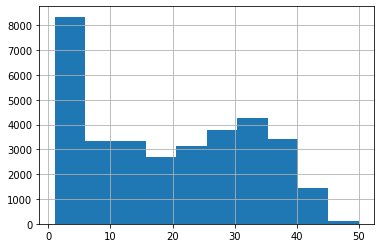

In [113]:
graficas.query('instalacion_fk == 1')['produccion_kWh'].hist()

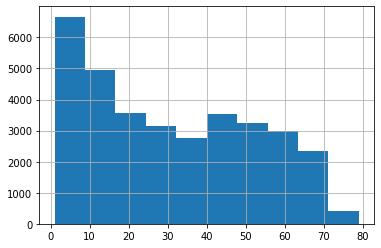

In [114]:
graficas.query('instalacion_fk == 2')['produccion_kWh'].hist()

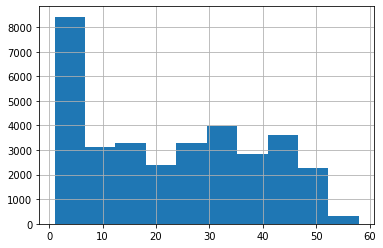

In [115]:
graficas.query('instalacion_fk == 4')['produccion_kWh'].hist()

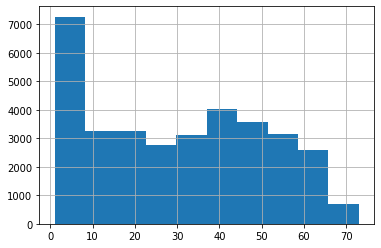

In [116]:
graficas.query('instalacion_fk == 5')['produccion_kWh'].hist()

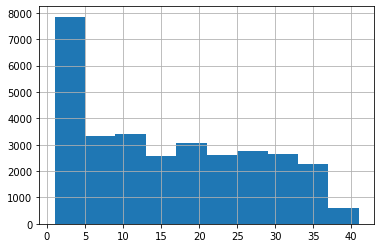

In [117]:
graficas.query('instalacion_fk == 6')['produccion_kWh'].hist()

In [118]:
produccion.groupby(by='consumo_kWh').count()

,instalacion_fk,cil,fecha,produccion_kWh,hora
consumo_kWh,,,,,
0,431113,431113,431113,431113,431113
1,78,78,78,78,78
2,9,9,9,9,9
3,4,4,4,4,4


In [119]:
x = produccion.query('produccion_kWh != 0')

x.sample(5)

,instalacion_fk,cil,fecha,consumo_kWh,produccion_kWh,hora
168135,4,ES0264123000505001GV1F001,2013-10-19 14:00:00,0,27,14
219188,5,ES0264121304508001QV1F001,2011-06-04 08:00:00,0,1,8
243679,5,ES0264121304508001QV1F001,2014-03-20 18:00:00,0,29,18
40835,1,ES0264123001068001BT1F001,2015-08-29 12:00:00,0,16,12
96279,2,ES0264123000373001SZ1F001,2013-10-13 13:00:00,0,25,13


In [120]:
x['año'] = x['fecha'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


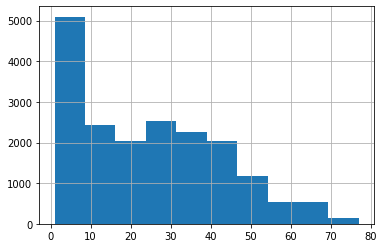

In [121]:
x[x['año'] == 2011 ]['produccion_kWh'].hist()

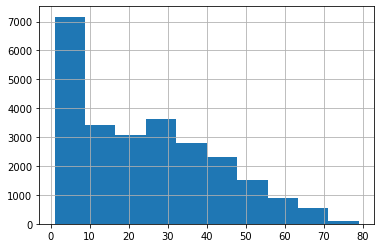

In [122]:
x[x['año'] == 2012 ]['produccion_kWh'].hist()

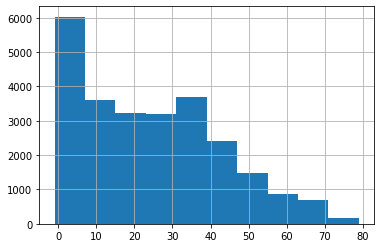

In [123]:
x[x['año'] == 2013 ]['produccion_kWh'].hist()

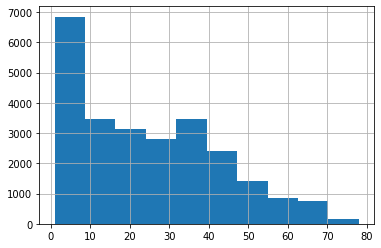

In [124]:
x[x['año'] == 2014 ]['produccion_kWh'].hist()

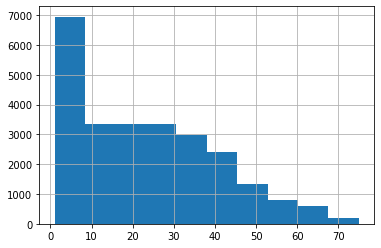

In [125]:
x[x['año'] == 2015 ]['produccion_kWh'].hist()

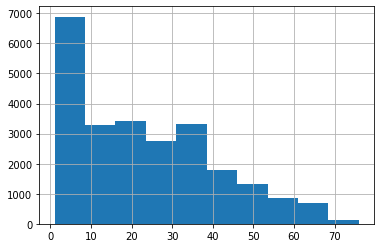

In [126]:
x[x['año'] == 2016 ]['produccion_kWh'].hist()

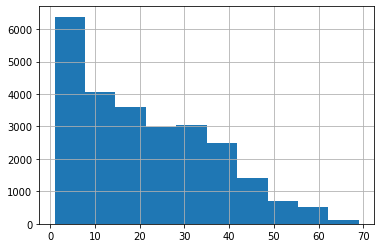

In [127]:
x[x['año'] == 2017 ]['produccion_kWh'].hist()

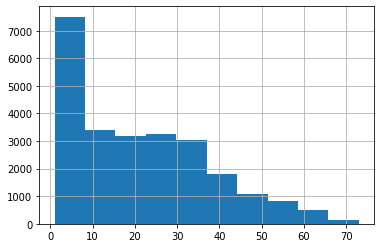

In [128]:
x[x['año'] == 2018 ]['produccion_kWh'].hist()

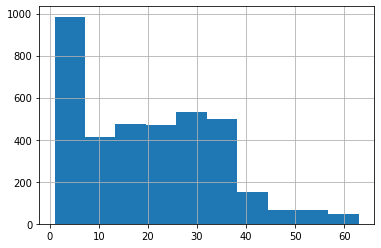

In [129]:
x[x['año'] == 2019 ]['produccion_kWh'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

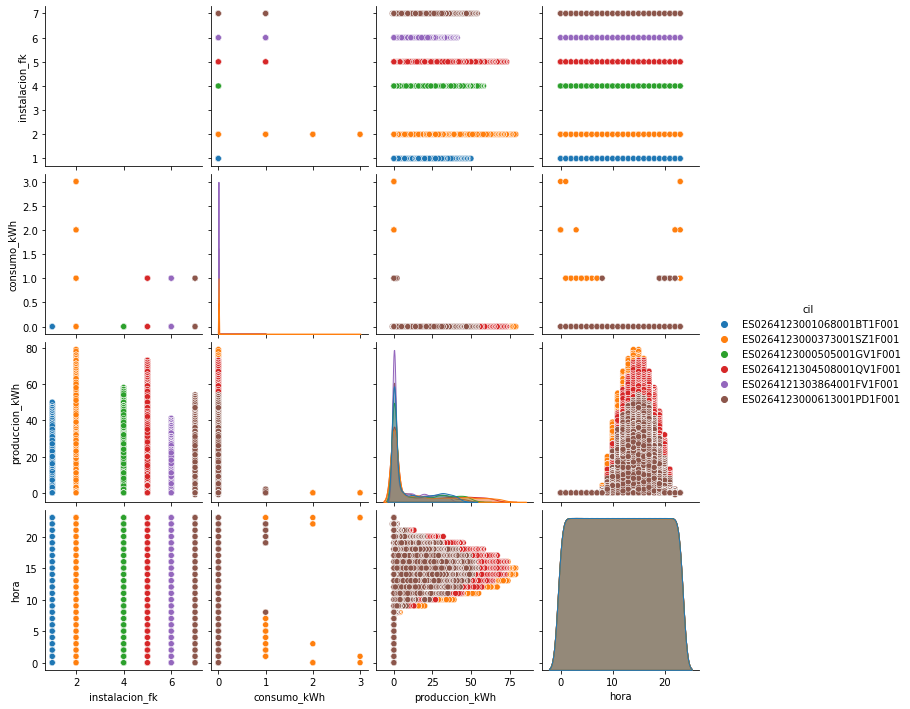

In [132]:
sns.pairplot(produccion, hue='cil')

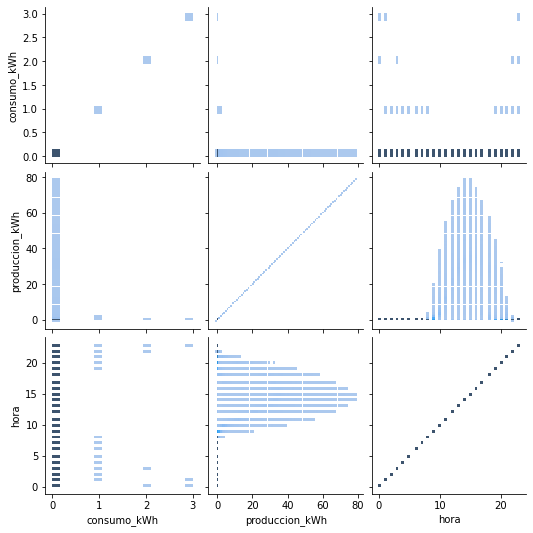

In [143]:
sns.pairplot(produccion.drop('instalacion_fk', axis=1), kind='hist', diag_kind=None)

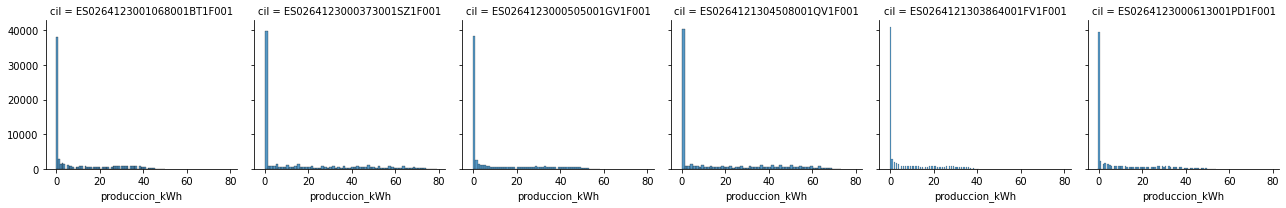

In [144]:
g = sns.FacetGrid(data = produccion, col = 'cil')
g.map(sns.histplot, 'produccion_kWh')